<a href="https://colab.research.google.com/github/satyam0402/Mastering-OpenCV-with-Python-MOCV-/blob/main/03_02_Color_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Color Segmentation </h1>

In this notebook, we are going to learn how to perform color segmentation with the help of the OpenCV function **`inRange()`**. The following images convey the idea. The first image contains three unique colors and we will demonstrate how to isolate each of the colors using HSV (Hue, Saturation, and Value) color space.
![OpenCV-logo-color-segmentation](https://opencv.org/wp-content/uploads/2021/08/c0-m3-OpenCV-logo-color-segmentation.jpg)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/s1bc9bnavqx9ryo/AABFVq9q_73nOcZ4T05k40rga?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

module-code.zip     100%[===================>]  89.84M  58.7MB/s    in 1.5s    
mapname:  conversion of  failed


# 1. Read and Display a Color Image

Text(0.5, 1.0, 'Original Image')

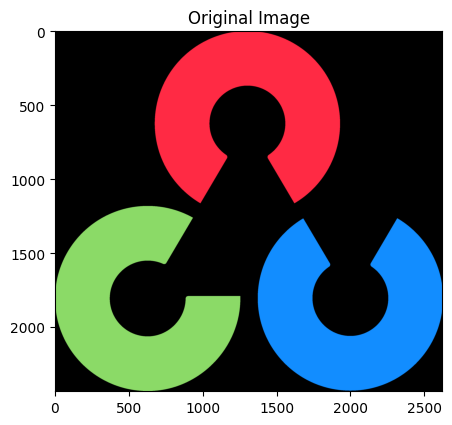

In [3]:
ocv_img = cv2.imread('/content/opencv_logo.png', cv2.IMREAD_COLOR)

plt.figure(figsize= (5,5))
plt.imshow(ocv_img[:,:,::-1]) #swap color channels from BGR to RGB
plt.title('Original Image')

# 2.  Convert the Image to HSV

Similar to the BGR color space, HSV contains three channels. However, instead of these channels representing how much Blue, Green, and Red contribute to a single pixel, HSV instead defines the color of a single pixel stands in terms of Hue, Saturation, and Value. Both BGR and HSV take up the same number of channels, so we can convert from one to the other with minimal impact to our image (small rounding errors may take effect).

In [5]:
ocv_img_hsv = cv2.cvtColor(ocv_img, cv2.COLOR_BGR2HSV)

# 3. Define Lower and Upper HSV Color Bounds

The HSV color space is cylindrical. In OpenCV, the Hue component is measure in degrees and has a range of `[0, 180]`. Saturation and Value both range from `[0, 255]`. The plot below shows a 2D representation of the color space. The Hue component is along the x-axis and the y-axis shows the Saturation component with a value of 255 being the most saturated. The entire plot is for a Value of 255 (the brightest value). You can imagine this plot as the outer layer of a cylinder (where the Value component is measured radially from the center of the cylinder). This is a very convenient color space to work with because the "color" is contained in a single component (H). The Saturation indicates how saturated the color is and the value indicates how bright or dark the color is.

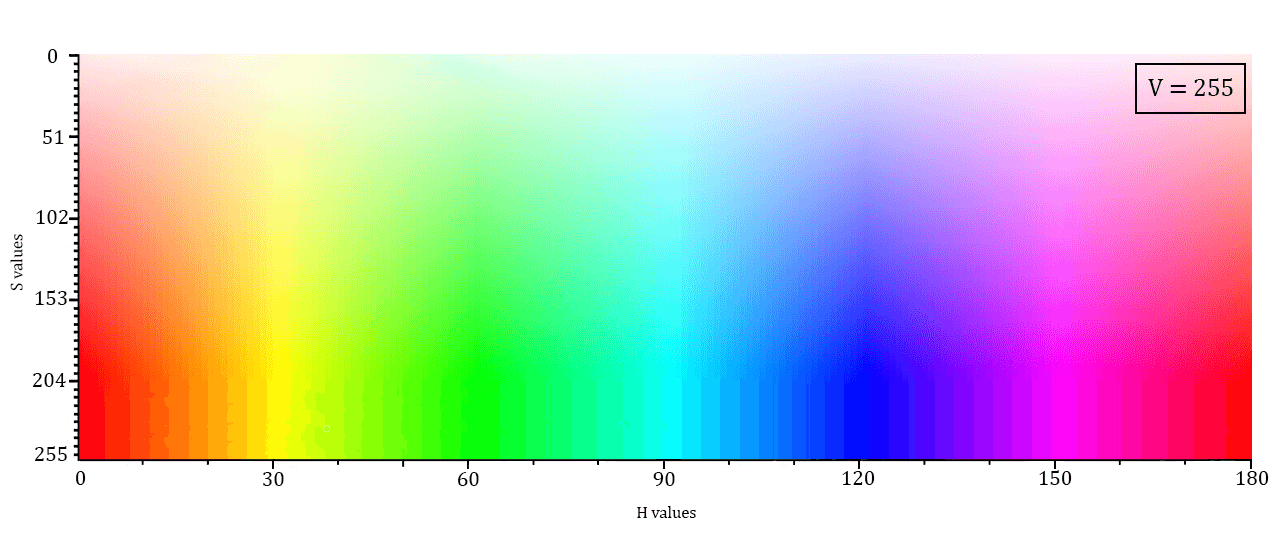

### <font style="color:rgb(50,120,230)">Select the lower and upper bounds for Red, Green and Blue</font>

Based on the HSV plot above we have selected lower and upper bounds for Red, Green, and Blue. Selecting the range in the Hue component is somewhat subjective and application-dependent. For the `S` and `V` components, we have selected a fixed range for all three colors as shown in the cell below to keep things simple.

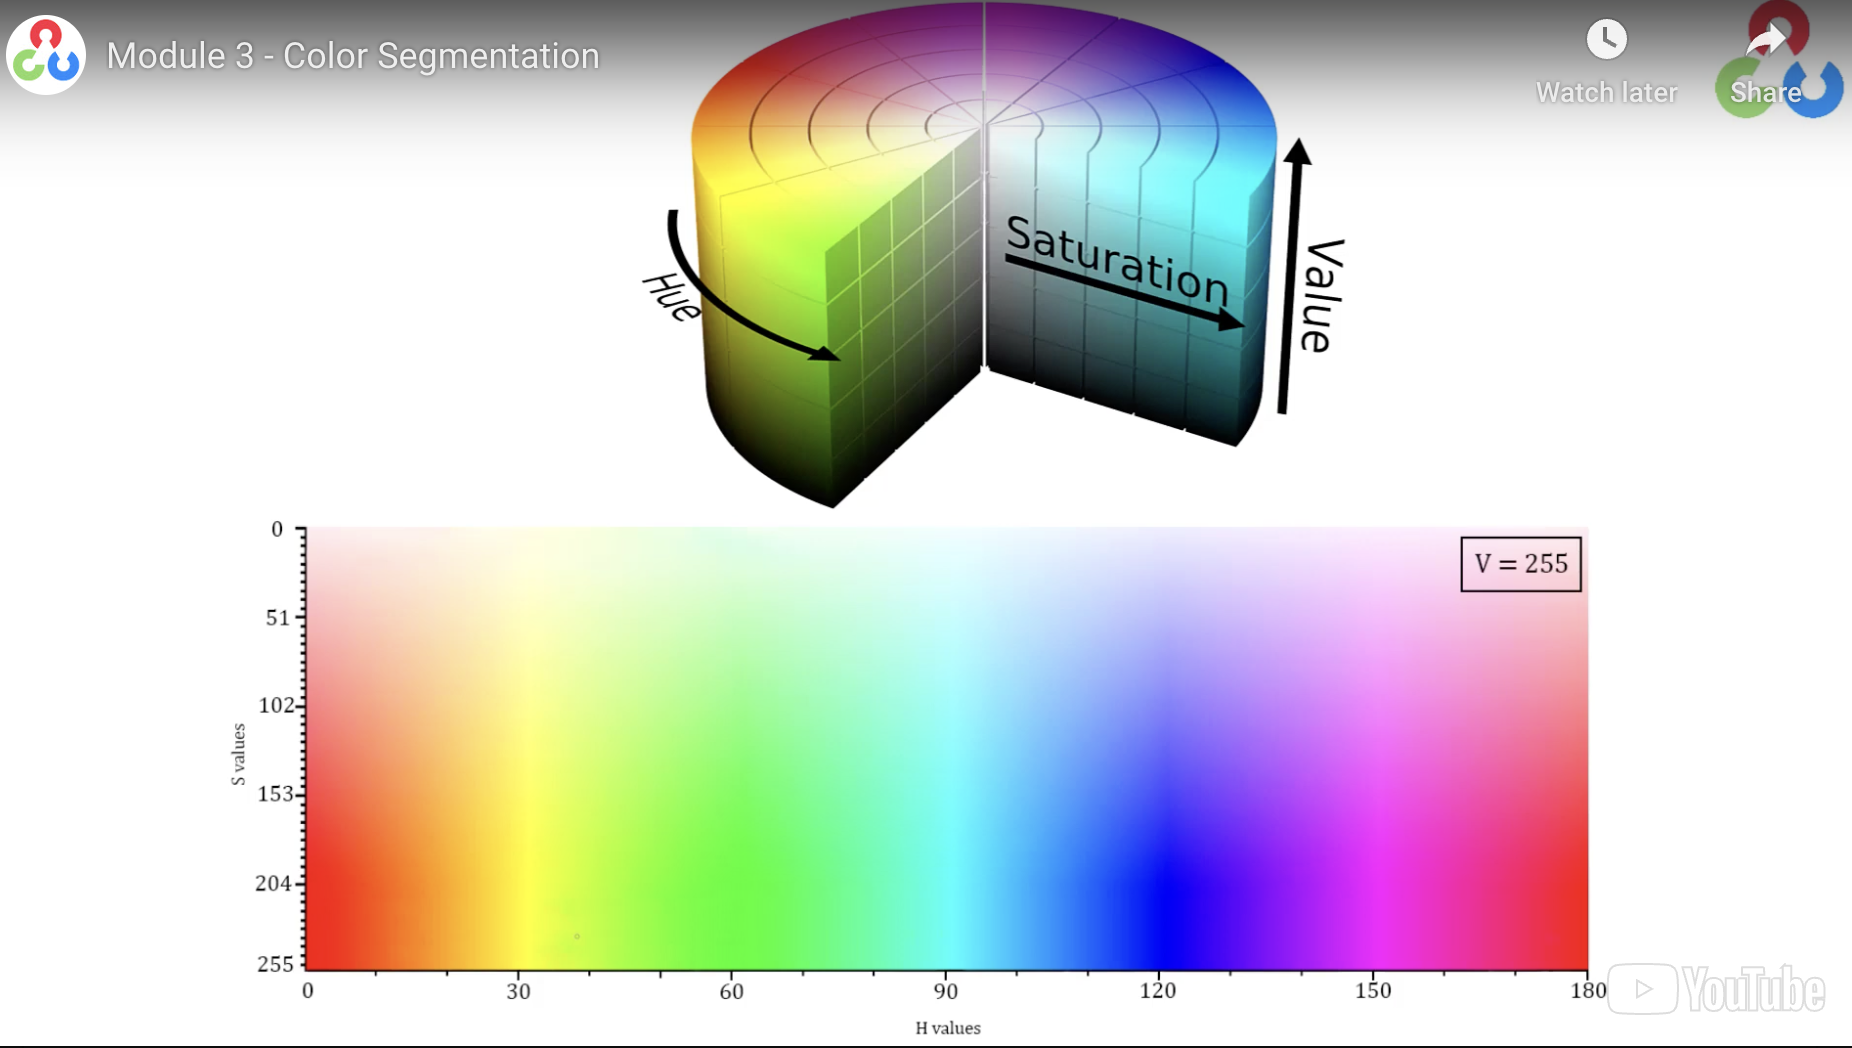

# 4. Define a Color Mask for each Color

In [13]:
# Set range for red color.
r_lb = np.array([165, 50, 50], np.uint8)
r_ub = np.array([180, 255, 255], np.uint8)

# Set range for green color.
g_lb = np.array([35, 50, 50], np.uint8)
g_ub = np.array([80, 255, 255], np.uint8)

# Set range for blue color.
b_lb = np.array([95, 50, 50], np.uint8)
b_ub = np.array([125, 255, 255], np.uint8)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(8,133,37)">Function Syntax </font>
```
dst = cv2.inRange(src, lowerb, upperb[, dst])
```

`dst`:	output array of the same size as src and CV_8U type

The function has 3 **required arguments**:
1. `src`:	first input array
2. `lowerb`:	inclusive lower boundary array or a scalar
3. `upperb`:	inclusive upper boundary array or a scalar

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`inRange()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'Blue Mask')

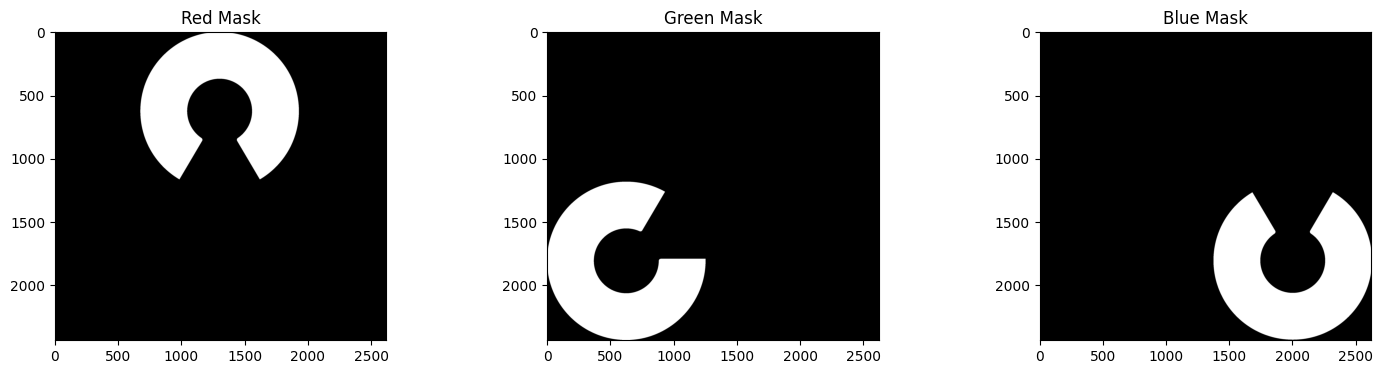

In [14]:
# Define each color mask
r_mask = cv2.inRange(ocv_img_hsv, r_lb, r_ub)
g_mask = cv2.inRange(ocv_img_hsv, g_lb, g_ub)
b_mask = cv2.inRange(ocv_img_hsv, b_lb, b_ub)

#Display each color mask
plt.figure(figsize=(18,4))
plt.subplot(131); plt.imshow(r_mask); plt.title('Red Mask')
plt.subplot(132); plt.imshow(g_mask); plt.title('Green Mask')
plt.subplot(133); plt.imshow(b_mask); plt.title('Blue Mask')

# 5.  Segment the Colors
Now that we have generated the color masks, we can segment each color from the original image using the `bitwise_and()` operation.
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`bitwise_and()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)


Text(0.5, 1.0, 'Blue Color Segmented')

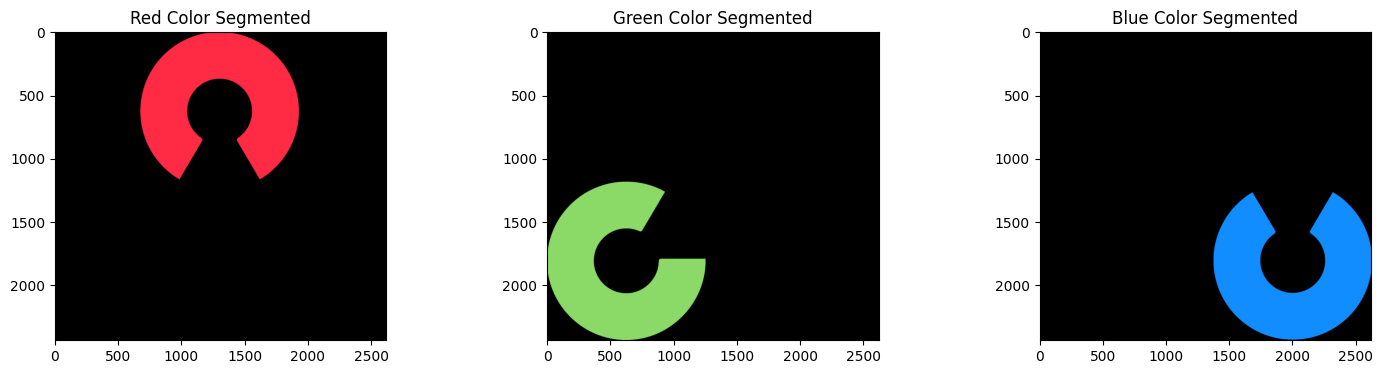

In [18]:
plt.figure(figsize=(18,4))
# Segment the colors
r_seg = cv2.bitwise_and(ocv_img, ocv_img, mask = r_mask)

plt.subplot(131); plt.imshow(r_seg[:, :, ::-1]); plt.title('Red Color Segmented')

g_seg = cv2.bitwise_and(ocv_img, ocv_img, mask=g_mask)
plt.subplot(132); plt.imshow(g_seg[:, :, ::-1]); plt.title('Green Color Segmented')

b_seg = cv2.bitwise_and(ocv_img, ocv_img, mask=b_mask)
plt.subplot(133); plt.imshow(b_seg[:, :, ::-1]); plt.title('Blue Color Segmented')
